## Pre-processing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data

In [2]:
stroke_data = pd.read_csv('data/healthcare-dataset-stroke-data.csv', encoding='unicode_escape')
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Questions to ask:
- Male/Female who has more strokes.
- People of which age group are more likely to get a stroke.
- Is hypertension a cause?

### Check info of dataset

In [3]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


So far we have 5110 rows and 12 columns. It seems that we have some missing data.

In [4]:
stroke_data. describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


`Observation`
- The average is 43
- Average glucose level is 106 (can be useful later).

### Data Cleaning

In [5]:
# The id column is not relevant
stroke_data.drop(columns=['id'],inplace=True) 

In [6]:
stroke_data.duplicated().sum()

0

In [7]:
stroke_data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
# Filled missing bmi with average
stroke_data.fillna({"bmi":stroke_data['bmi'].mean().round(1)}, inplace=True)

In [9]:
stroke_data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
# drop 1 patient with other for gender 
stroke_data['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [11]:
print(stroke_data[stroke_data['gender']=='Other'].index.values)

[3116]


In [12]:
stroke_data = stroke_data.drop(3116)
stroke_data['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

Use describe() to show details of data, make sure that there is nothing out of the ordinary in this data set

In [13]:
stroke_data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,43.229986,0.097475,0.054022,106.140399,28.894774,0.048738
std,22.613575,0.296633,0.226084,45.285004,7.698235,0.215340
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.240000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.880000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Outliers Handling

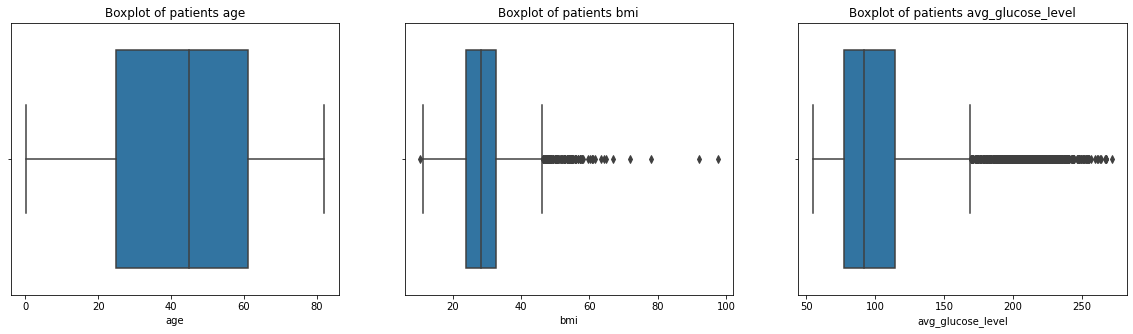

In [14]:
num_cols = ['age', 'bmi', 'avg_glucose_level']

plt.figure(figsize=(20, 5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=stroke_data[num_cols[i]])
    plt.title('Boxplot of patients %s' %(num_cols[i]))
    plt.xlabel(num_cols[i])
    
plt.show()

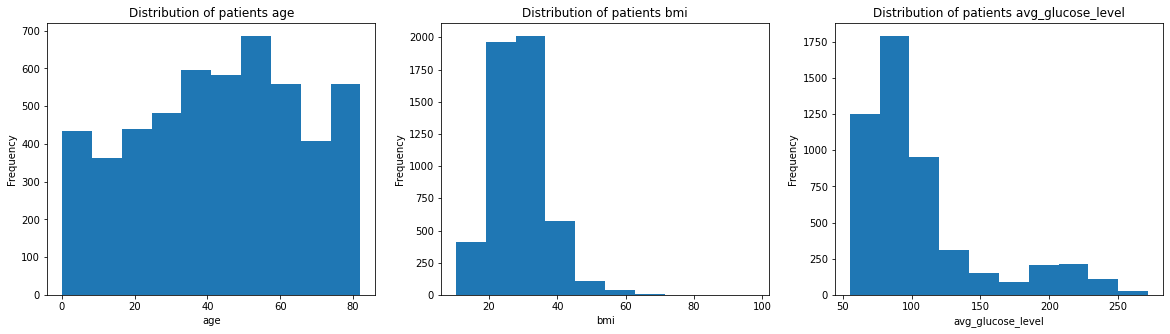

In [15]:
plt.figure(figsize=(20, 5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    stroke_data[num_cols[i]].plot(kind='hist')
    plt.title('Distribution of patients %s' %(num_cols[i]))
    plt.xlabel(num_cols[i])
    
plt.show()

## Data Visualization

Text(0.5, 0, 'Gender')

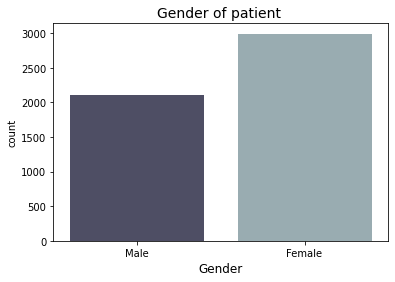

In [20]:
sns.countplot(x=stroke_data['gender'], palette='bone')
plt.title('Gender of patient ', size=14)
plt.xlabel('Gender', size=12)

Text(0.5, 1.0, "Distribution of patients' gender ")

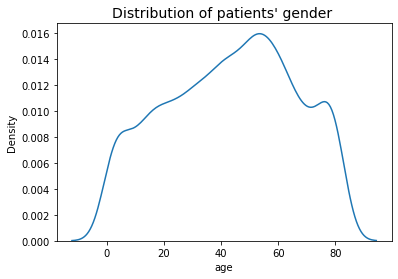

In [22]:
sns.kdeplot(stroke_data['age'])
plt.title('Distribution of patients\' gender ', size=14)

### Correlation plot

<AxesSubplot:>

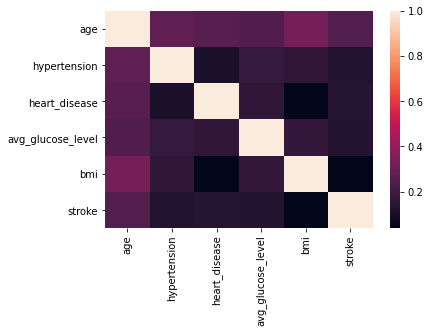

In [19]:
sns.heatmap(stroke_data.corr())

Observations:
1) No strong correlation between our features.
2) The highest correlation can be observed between body mass index(bmi) and age.
3) The weakest correlation can be observed between heart_disease and hyper_tension.